In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from scipy import interpolate

In [2]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

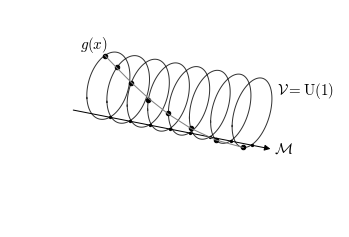

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')


ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

eta = 1.0
lam = 0.8
#Circle
r_c = np.ones(100)*eta
theta_c = np.arange(-np.pi,np.pi+0.1,(2*np.pi+0.1)/100.)
z_c = np.zeros(100)

x_c = r_c*np.cos(theta_c)
y_c = r_c*np.sin(theta_c)

ax.plot(x_c,y_c,z_c,color='Black',alpha=0)



#Axis arrows
top = 2.2
head_size = 12
b = Arrow3D([0,0], [-2.8,3], 
                [0,0], mutation_scale=head_size, 
                lw=1, arrowstyle="-|>", color="Black",zorder=0)
#ax.add_artist(b)
c = Arrow3D([-3,2], [0,0], 
                [0,0], mutation_scale=head_size, 
                lw=1, arrowstyle="-|>", color="Black",zorder=0)
#ax.add_artist(c)

d = Arrow3D([-3,2], [0,0], 
                [0.5,0.5], mutation_scale=head_size, 
                lw=1, arrowstyle="-|>", color="Black",zorder=0,alpha=1)
ax.add_artist(d)

scale = 0.5

section = []
points = [] 
for i in np.arange(-4,4,1):
    ax.plot(z_c + i/2.0,x_c*scale,y_c*scale+1,color='Black',alpha=0.8)
    index = i*6
    section.append([z_c[index] + i/2.0,x_c[index]*scale,y_c[index]*scale+1])
    points.append([z_c[25] + i/2.0,x_c[25]*scale,y_c[25]*scale+1])

section = np.asarray(section).reshape([-1,3])
points = np.asarray(points).reshape([-1,3])



tck, u = interpolate.splprep([section[:,0],section[:,1],section[:,2]], s=2)
x_knots, y_knots, z_knots = interpolate.splev(tck[0], tck)
u_fine = np.linspace(0,1,8)
x_fine, y_fine, z_fine = interpolate.splev(u_fine, tck)
ax.plot(x_fine, y_fine, z_fine, 'Grey',zorder=2)#,ls=':')

ax.scatter(section[:,0],section[:,1],section[:,2],c='Black',depthshade=False,alpha=1,zorder=10)
ax.scatter(points[:,0],points[:,1],points[:,2],c='Black',depthshade=False,alpha=1,marker='.')


#ax.text(1.95, 0, -0.1, "$\mathcal{M}$", color='Black',size=15)
ax.text(2.05, 0, 0.45, "$\mathcal{M}$", color='Black',size=15)
ax.text(2.05, 0, 1.35, "$\mathcal{V} = \mathrm{U}(1)$", color='Black',size=15)
ax.text(-2.7, 0, 1.5, "$g(x)$", color='Black',size=15)


plt.savefig('fibre_bundle.pdf', bbox_inches='tight', pad_inches=0)
plt.show()